# Build a model to recommend the user amazon products.




# Objective: -
In this modern world we are overloaded with data and this data provides us the useful information. But it's not possible for the user to extract the information which interest them from these data. In order to help the user to find out information about the product , recommedation systems where developed.

Recommeder system creates a similarity between the user and items and exploits the similarity between user/item to make recommendations.The Recommendation System of Amazon follows the principle of generating product based recommendations which means measuring the similarities between two products and then recommend the most similar products to each user. The methods of measuring similarities between two products have always been a major focus of researchers.

But when it comes to a website like Amazon, it needs to add more criteria to recommend products to the users such as the quality of the product. A good quality product will always have a good collection of reviews so we can use both the similarity score and product reviews to generate recommendations.

The goal is to build a movie recommendation model that can predict and recommend the prodcut based on product score and rating.

# Dataset: -
This dataset is based on the electronics products available on Amazon based on their ratings.



**Four real-valued features:**

1. userId : Every user identified with a unique id
2. productId : Every product identified with a unique id
3. Rating : Rating of the corresponding product by the corresponding user
4. timestamp : Time of the rating 

# Step 1: Import all the required libraries

- __Pandas__ : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series
- __Sklearn__ : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.
- __Pickle__ : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
- __Seaborn__ : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- __Matplotlib__ : Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.
- __NLTK__ :The Natural Language Toolkit (NLTK) is a platform used for building Python programs that work with human language data for applying in statistical natural language processing (NLP).It contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning.

In [1]:
#Loading libraries 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import warnings

warnings.filterwarnings('ignore')

# Step 2 : Read dataset and basic details of dataset
Goal:- In this step we are going to read the dataset, view the dataset and analysis the basic details like total number of rows and columns, what are the column data types and see to need to create new column or not.


In this stage we are going to read our problem dataset and have a look on it.

In [2]:
#loading the dataset
try:
    df = pd.read_csv('C:/My Sample Notebook/Notebook Template/Amazon Recommendation/data/amazon.csv') #Path for the file
    print('Data read done successfully...')
except (FileNotFoundError, IOError):
    print("Wrong file or file path")   

Data read done successfully...


In [3]:
# To view the content inside the dataset we can use the head() method that returns a specified number of rows, string from the top. 
# The head() method returns the first 5 rows if a number is not specified.
df.head()

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


The dataset that we are using here does not have columns names, so let’s give the most appropriate names to these columns:

In [4]:
df.columns = ['user_id', 'product_id','ratings','timestamp']

The dataset is very big so we will use 10% of the data.

In [5]:
df = df[:int(len(df)*.1)]

# Step3: Data Preprocessing

**Why need of Data Preprocessing?**

Preprocessing data is an important step for data analysis. The following are some benefits of preprocessing data:

 - It improves accuracy and reliability. Preprocessing data removes missing or inconsistent data values resulting from human or computer error, which can improve the accuracy and quality of a dataset, making it more reliable.
 - It makes data consistent. When collecting data, it's possible to have data duplicates, and discarding them during preprocessing can ensure the data values for analysis are consistent, which helps produce accurate results.
 - It increases the data's algorithm readability. Preprocessing enhances the data's quality and makes it easier for machine learning algorithms to read, use, and interpret it.

**Why we drop column?**

Axis are defined for arrays with more than one dimension. A 2-dimensional array has two corresponding axes: the first running vertically downwards across rows (axis 0) 
and the second running horizontally across columns (axis 1).

After we read the data, we can look at the data using:

In [6]:
# count the total number of rows and columns.
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 782448 rows and 4 columns


#### The df.value_counts() method counts the number of types of values a particular column contains. 

In [7]:
df.shape

(782448, 4)

#### The df.shape method shows the shape of the dataset. 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782448 entries, 0 to 782447
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     782448 non-null  object 
 1   product_id  782448 non-null  object 
 2   ratings     782448 non-null  float64
 3   timestamp   782448 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 23.9+ MB


#### The df.info() method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage. 

In [9]:
df.iloc[1]

user_id       A2NWSAGRHCP8N5
product_id        0439886341
ratings                  1.0
timestamp         1367193600
Name: 1, dtype: object

####  df.iloc[ ] is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array. The iloc property gets, or sets, the value(s) of the specified indexes.

### Data Type Check for every column

**Why data type check is required?**

Data type check helps us with understanding what type of variables our dataset contains. It helps us with identifying whether to keep that variable or not. If the dataset contains contiguous data, then only float and integer type variables will be beneficial and if we have to classify any value then categorical variables will be beneficial.

In [10]:
objects_cols = ['object']
objects_lst = list(df.select_dtypes(include=objects_cols).columns)

In [11]:
print("Total number of categorical columns are ", len(objects_lst))
print("There names are as follows: ", objects_lst)

Total number of categorical columns are  2
There names are as follows:  ['user_id', 'product_id']


In [12]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)

In [13]:
print("Total number of numerical columns are ", len(int64_lst))
print("There names are as follows: ", int64_lst)

Total number of numerical columns are  1
There names are as follows:  ['timestamp']


In [14]:
float64_cols = ['float64']
float64_lst = list(df.select_dtypes(include=float64_cols).columns)

In [15]:
print("Total number of float64 columns are ", len(float64_lst))
print("There name are as follow: ", float64_lst)

Total number of float64 columns are  1
There name are as follow:  ['ratings']


## Step 2 Insights: -

1) We have total 4 features where 2 of them is object type and others 1-1 are integer and float type.


After this step we have to calculate various evaluation parameters which will help us in cleaning and analysing the data more accurately.

# Step 3: Descriptive Analysis

**Goal/Purpose:**  Finding the data distribution of the features. Visualization helps to understand data and also to explain the data to another person.

Things we are going to do in this step:

1. Mean
2. Median
3. Mode
4. Standard Deviation
5. Variance
6. Null Values
7. NaN Values
8. Min value
9. Max value
10. Count Value
11. Quatilers
12. Correlation
13. Skewness

In [16]:
df.describe()

,ratings,timestamp
count,782448.000000,7.824480e+05
mean,3.981954,1.242607e+09
std,1.396133,1.163992e+08
min,1.000000,9.127296e+08
25%,3.000000,1.154650e+09
50%,5.000000,1.247270e+09
75%,5.000000,1.356653e+09
max,5.000000,1.406074e+09


#### The df.describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value. 

# Measure the variability of data of the dataset

Variability describes how far apart data points lie from each other and from the center of a distribution.

# Measure central tendency

A measure of central tendency is a single value that attempts to describe a set of data by identifying the central position within that set of data. As such, measures of central tendency are sometimes called measures of central location. They are also classed as summary statistics.



Mean - The average value. Median - The mid point value. Mode - The most common value.

# 1. Mean

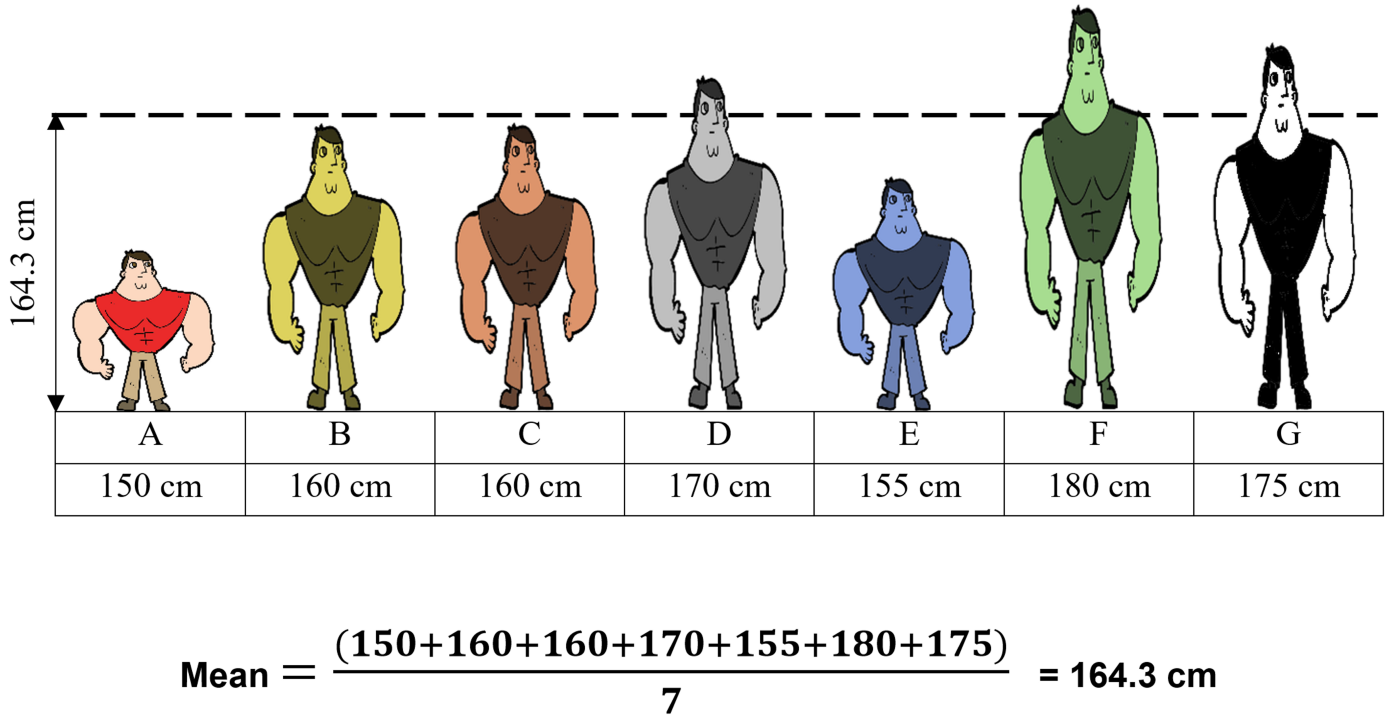

The mean is the arithmetic average, and it is probably the measure of central tendency that you are most familiar.

#### Why do we calculate mean?




The mean is used to summarize a data set. It is a measure of the center of a data set.


In [17]:
#df.mean()

zero_value -> that the mean of a paticular column is zero, which isn't usefull in anyway and need to be drop.

# 3. Mode
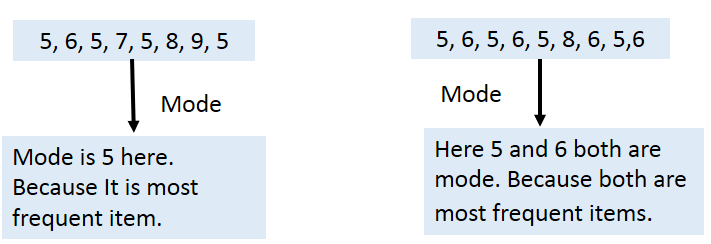
The mode is the value that occurs the most frequently in your data set. On a bar chart, the mode is the highest bar. If the data have multiple values that are tied for occurring the most frequently, you have a multimodal distribution. If no value repeats, the data do not have a mode.

#### Why do we calculate mode ?

The mode can be used to summarize categorical variables, while the mean and median can be calculated only for numeric variables. This is the main advantage of the mode as a measure of central tendency. It's also useful for discrete variables and for continuous variables when they are expressed as intervals.

In [18]:
df.mode()

,user_id,product_id,ratings,timestamp
0,A5JLAU2ARJ0BO,B0002L5R78,5.0,1168300800


# Null and Nan values

1. **Null Values**


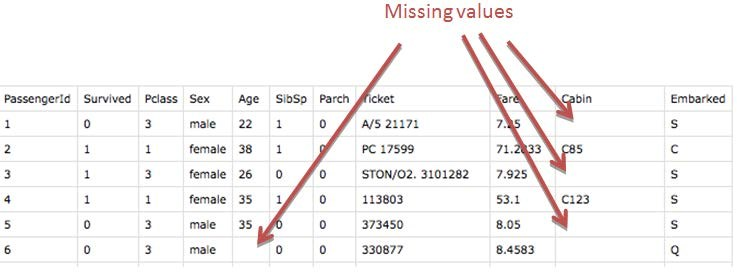

A null value in a relational database is used when the value in a column is unknown or missing. A null is neither an empty string (for character or datetime data types) nor a zero value (for numeric data types).

In [19]:
df.isnull().sum()

user_id       0
product_id    0
ratings       0
timestamp     0
dtype: int64

As we notice that there are so many null values in our dataset.

2. **Nan Values**

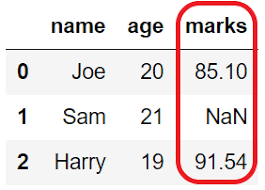

NaN, standing for Not a Number, is a member of a numeric data type that can be interpreted as a value that is undefined or unrepresentable, especially in floating-point arithmetic.

In [20]:
df.isna().sum()

user_id       0
product_id    0
ratings       0
timestamp     0
dtype: int64

As we notice that there are so many nan values in our dataset.

# Count of unique occurences of every value in all categorical value



In [21]:
for value in objects_lst:
    
    print(f"{value:{10}} {df[value].value_counts()}")

user_id    A5JLAU2ARJ0BO     384
A231WM2Z2JL0U3    249
A25HBO5V8S8SEA    163
A6FIAB28IS79      113
AT6CZDCP4TRGA     112
                 ... 
AYK3XA6M9FGSC       1
AQ1OMXIN4TQ0H       1
A2M4KVAS2J9O3C      1
AAQBM3POZKT9H       1
AY5IAT0TP4OAW       1
Name: user_id, Length: 606149, dtype: int64
product_id B0002L5R78    9487
B0001FTVEK    5345
B000BQ7GW8    4275
B00007E7JU    3523
B000BKJZ9Q    3219
              ... 
B00009UHFS       1
B0007CM6HQ       1
B00009UHFR       1
B00009UHFP       1
0321732944       1
Name: product_id, Length: 47104, dtype: int64


- Categorical data are variables that contain label values rather than numeric values.The number of possible values is often limited to a fixed set.
- Use Label Encoder to label the categorical data. Label Encoder is the part of SciKit Learn library in Python and used to convert categorical data, or text data, into numbers, which our predictive models can better understand.



### Step 3 Insights: - 

With the statistical analysis we have found that the data have a lot of skewness in them all the columns are positively skewed with mostly zero variance.

Statistical analysis is little difficult to understand at one glance so to make it more understandable we will perform visulatization on the data which will help us to understand the process easily.

**As there is no column that requires descriptive analysis because in recommendation system their is no use of such metrics as everything is calculated on the basis of customer's reviews only.**

### Why we are calculating all these metrics? 

Mean / Median /Mode/ Variance /Standard Deviation are all very basic but very important concept of statistics used in data science. Almost all the machine learning algorithm uses these concepts in data preprocessing steps. These concepts are part of descriptive statistics where we basically used to describe and understand the data for features in Machine learning

# Step 4: Data Exploration
**Goal/Purpose:**

Graphs we are going to develop in this step

1. Histogram of all columns to check the distrubution of the columns
2. Distplot or distribution plot of all columns to check the variation in the data distribution
3. Heatmap to calculate correlation within feature variables
4. Boxplot to find out outlier in the feature columns

# 1. Histogram

A histogram is a bar graph-like representation of data that buckets a range of classes into columns along the horizontal x-axis.The vertical y-axis represents the number count or percentage of occurrences in the data for each column

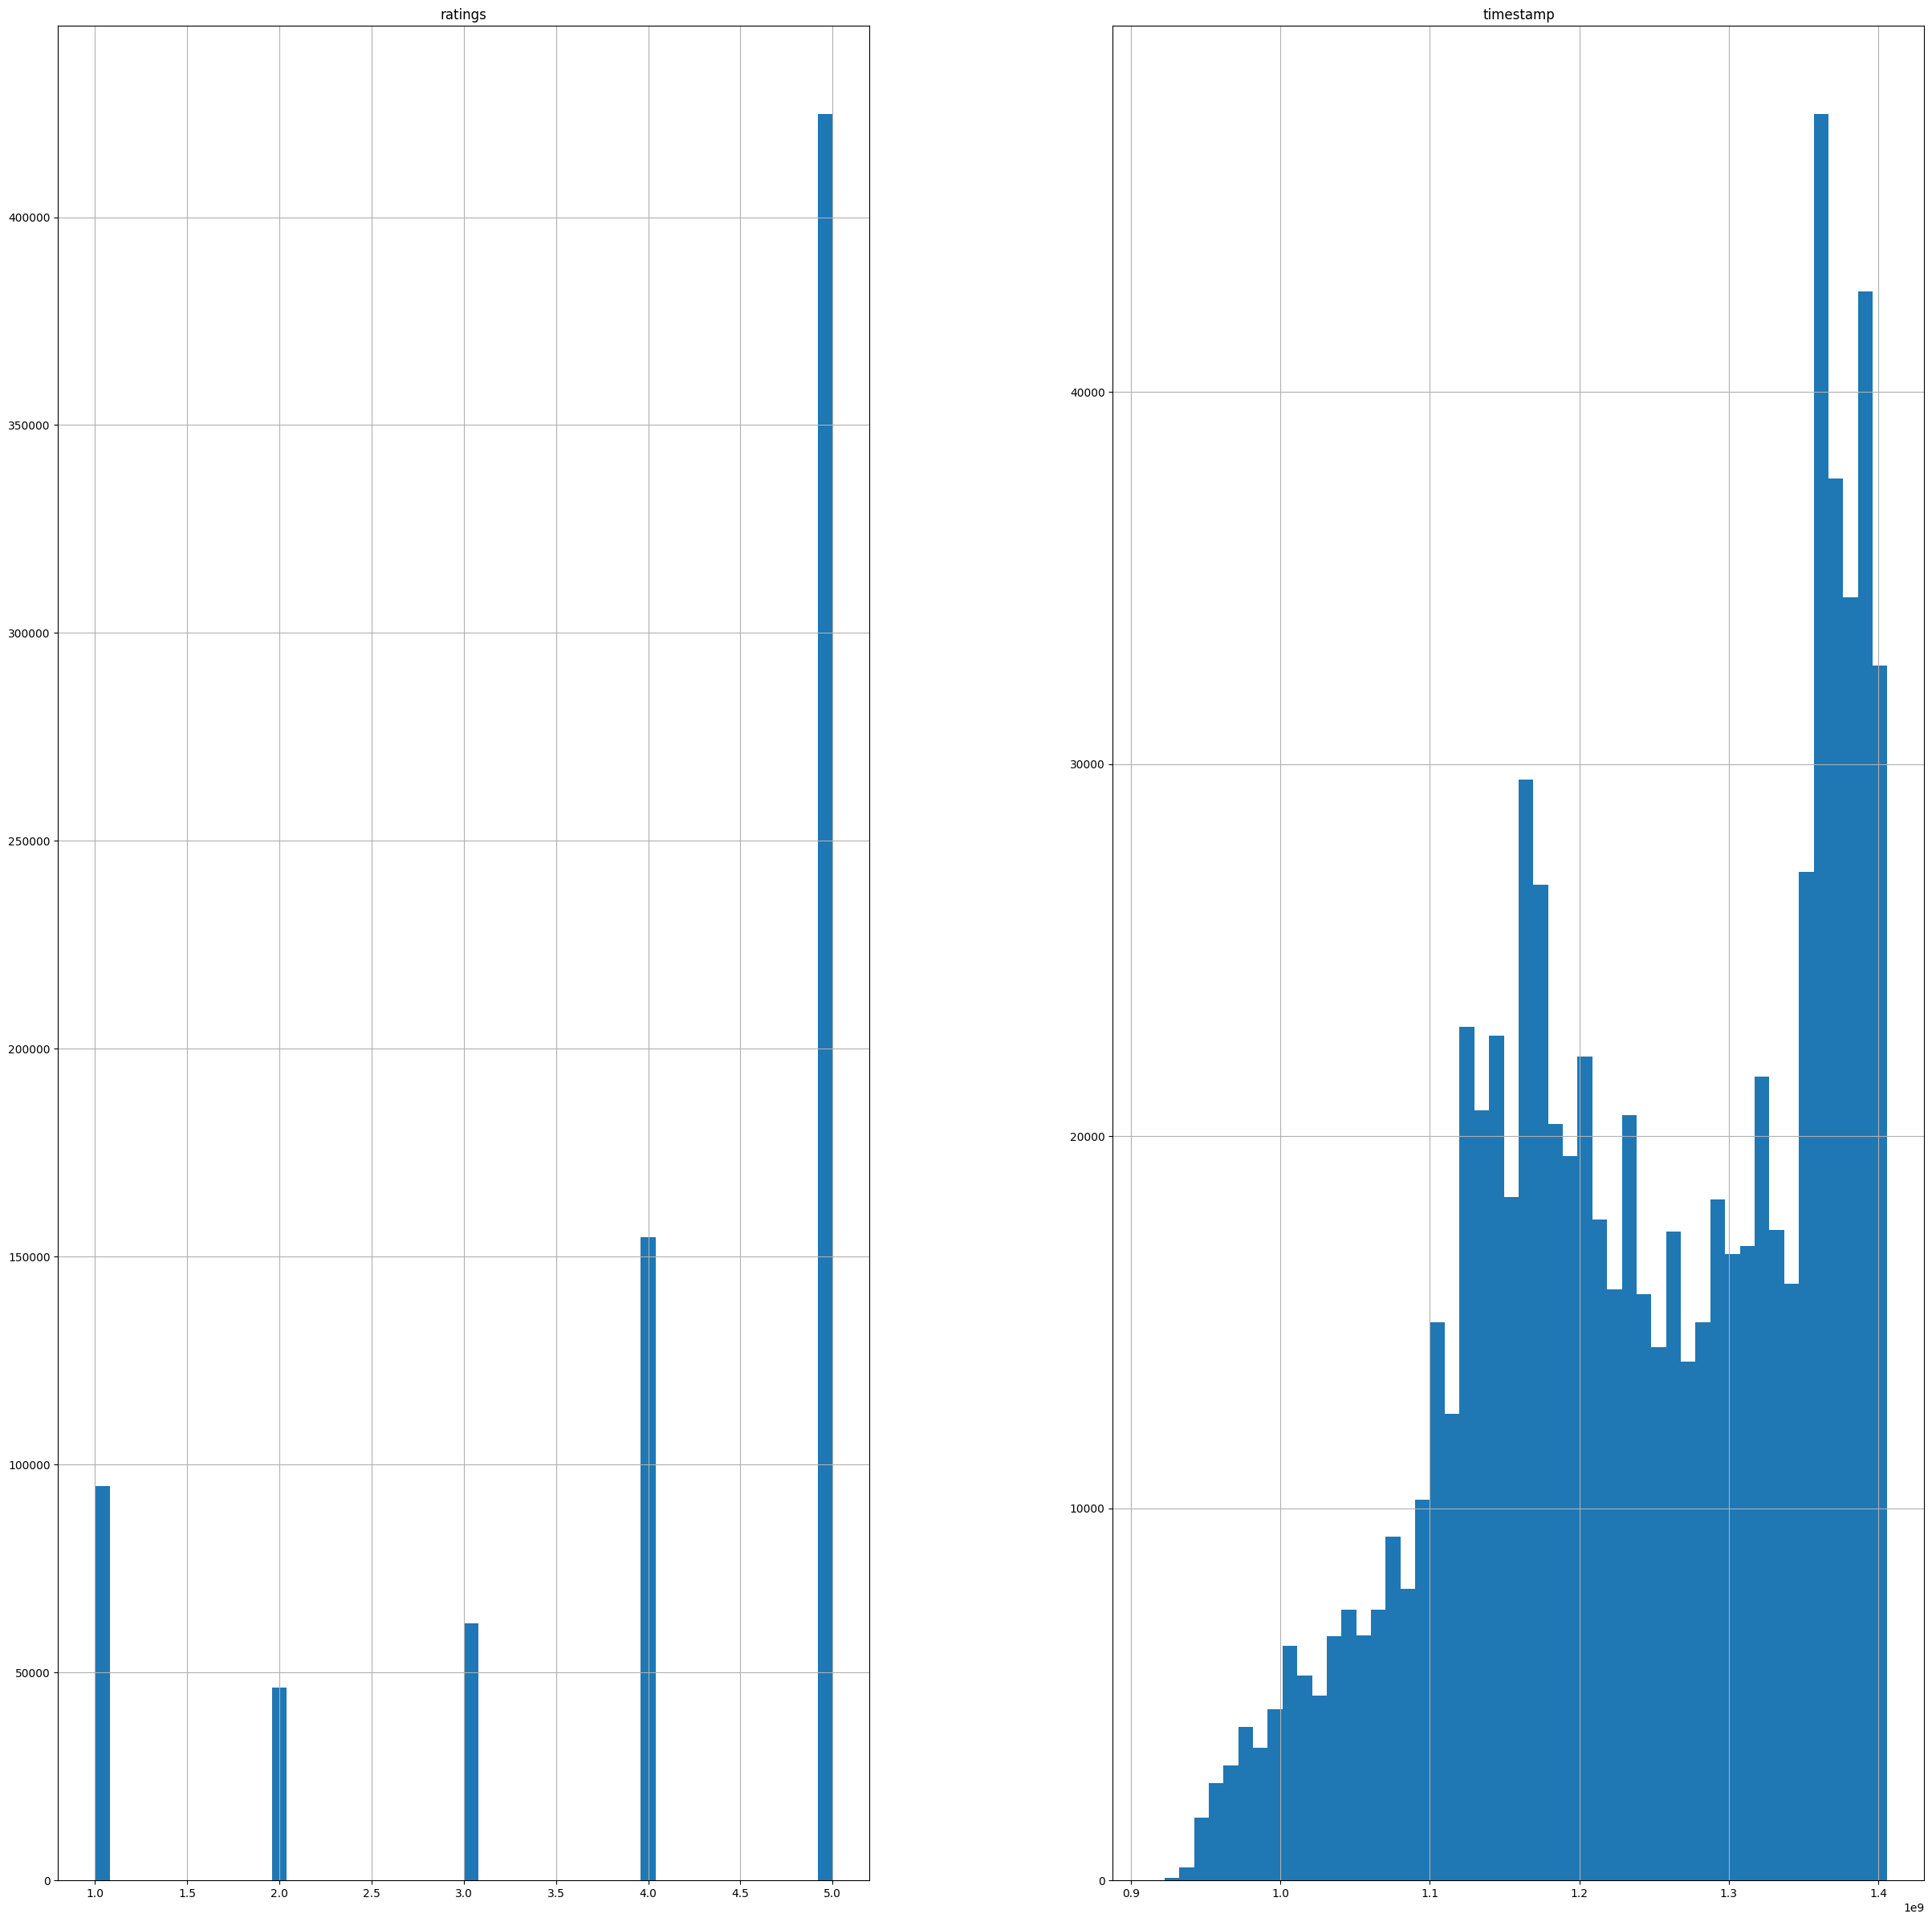

In [22]:
# Distribution in attributes
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(30,30))
plt.show()


### Histogram Insight: -

Histogram helps in identifying the following:
- View the shape of your data set’s distribution to look for outliers or other significant data points.

- Determine whether something significant has boccurred from one time period to another.

### Why Histogram? 

It is used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

From the above graphical representation we can identify that the highest bar represents the outliers which is above the maximum range.

We can also identify that the values are moving on the right side, which determines positive and the centered values determines normal skewness.

# 2. Distplot

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables. The Seaborn module along with the Matplotlib module is used to depict the distplot with different variations in it 

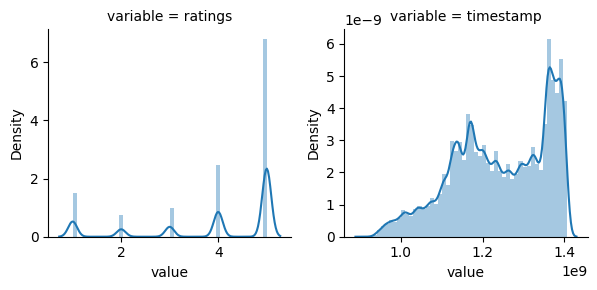

In [23]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

### Distplot Insights: -

Above is the distrution bar graphs to confirm about the statistics of the data about the skewness, the above results are:
- 2 columns are negative skewed.

### Why Distplot?
Skewness is demonstrated on a bell curve when data points are not distributed symmetrically to the left and right sides of the median on a bell curve. If the bell curve is shifted to the left or the right, it is said to be skewed.

We can observe that the bell curve is shifted to left we indicates positive skewness.As all the column are positively skewed we don't need to do scaling.

Let's proceed and check the distribution of the target variable.


<AxesSubplot: xlabel='ratings', ylabel='count'>

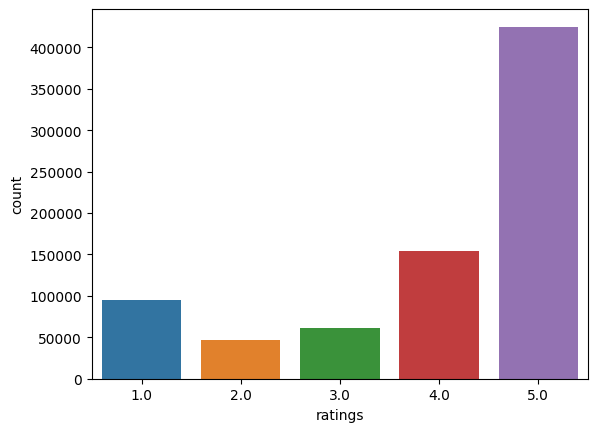

In [25]:
# Check the distribution of the rating
sns.countplot(x=df["ratings"])

## From the above graph we can observe that most of the Amazon customers have rated 5 stars to the products.

### Unique Users and products

In [27]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",df.shape[0])
print("Total No of Users   :", len(np.unique(df.user_id)))
print("Total No of products  :", len(np.unique(df.product_id)))

Total data 
--------------------------------------------------

Total no of ratings : 782448
Total No of Users   : 606149
Total No of products  : 47104


## Analyzing the rating

In [28]:
no_of_rated_products_per_user = df.groupby(by='user_id')['ratings'].count().sort_values(ascending=False)

no_of_rated_products_per_user.head()

user_id
A5JLAU2ARJ0BO     384
A231WM2Z2JL0U3    249
A25HBO5V8S8SEA    163
A6FIAB28IS79      113
AT6CZDCP4TRGA     112
Name: ratings, dtype: int64

## Types of recommendations
### There are mainly 6 types of the recommendations systems :-

**Popularity based systems :-** It works by recommeding items viewed and purchased by most people and are rated high.It is not a personalized recommendation.

**Classification model based:**- It works by understanding the features of the user and applying the classification algorithm to decide whether the user is interested or not in the prodcut.

**Content based recommedations:-** It is based on the information on the contents of the item rather than on the user opinions.The main idea is if the user likes an item then he or she will like the "other" similar item.

**Collaberative Filtering:-** It is based on assumption that people like things similar to other things they like, and things that are liked by other people with similar taste. it is mainly of two types: a) User-User b) Item -Item

**Hybrid Approaches:-** This system approach is to combine collaborative filtering, content-based filtering, and other approaches .

**Association rule mining :-** Association rules capture the relationships between items based on their patterns of co-occurrence across transactions.

# Step 2: Data Preparation

In [30]:
#Getting the new dataframe which contains users who has given 50 or more ratings

new_df=df.groupby("product_id").filter(lambda x:x['ratings'].count() >=50)

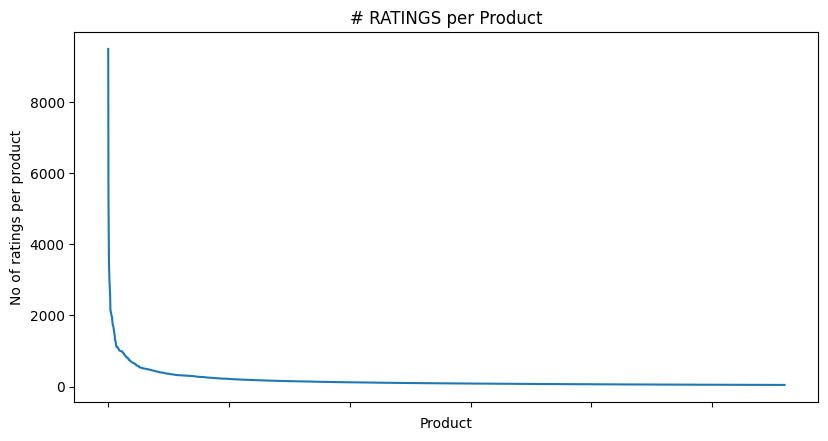

In [31]:
no_of_ratings_per_product = new_df.groupby(by='product_id')['ratings'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.title('# RATINGS per Product')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()

In [32]:
new_df.groupby('product_id')['ratings'].mean().sort_values(ascending=False).head()

product_id
B0000DYV9H    4.947368
B000053HC5    4.945783
B00009R96C    4.885714
B00005LE76    4.879310
B0002E52S4    4.861111
Name: ratings, dtype: float64

#### Above are the amazon products sorted in descending order based on mean values.

In [33]:
#Total no of rating for product

new_df.groupby('product_id')['ratings'].count().sort_values(ascending=False).head()

product_id
B0002L5R78    9487
B0001FTVEK    5345
B000BQ7GW8    4275
B00007E7JU    3523
B000BKJZ9Q    3219
Name: ratings, dtype: int64

#### Above are the amazon products sorted in descending order based on count values.
The top amazon product is the most rated product according to customer ratings.

In [34]:
ratings_mean_count = pd.DataFrame(new_df.groupby('product_id')['ratings'].mean())

In [35]:
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('product_id')['ratings'].count())

In [36]:
ratings_mean_count.head()

,ratings,rating_counts
product_id,,
0972683275,4.470980,1051
1400501466,3.560000,250
1400501520,4.243902,82
1400501776,3.884892,139
1400532620,3.684211,171


#### The above table shows the rating count for a particular product along with their mean ratings

<AxesSubplot: >

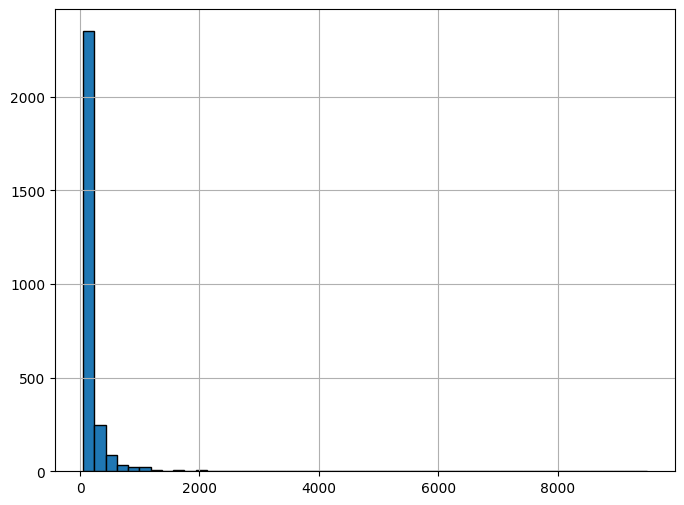

In [37]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

<AxesSubplot: >

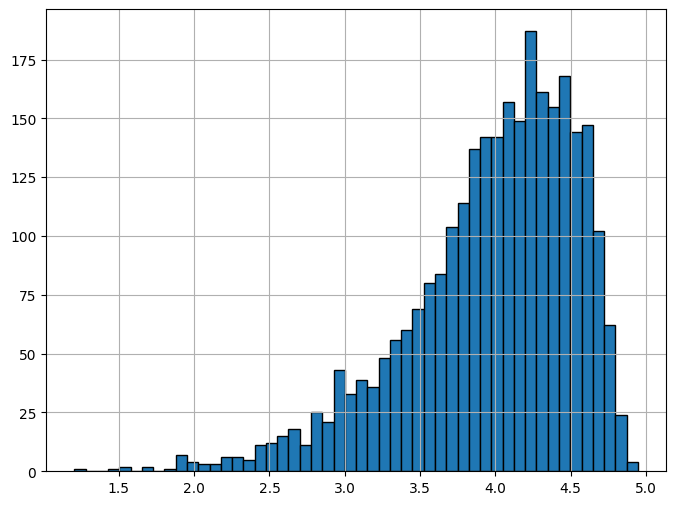

In [39]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['ratings'].hist(bins=50)`

### The above graph shows the mean ratings according to customer ratings.

<Figure size 800x600 with 0 Axes>

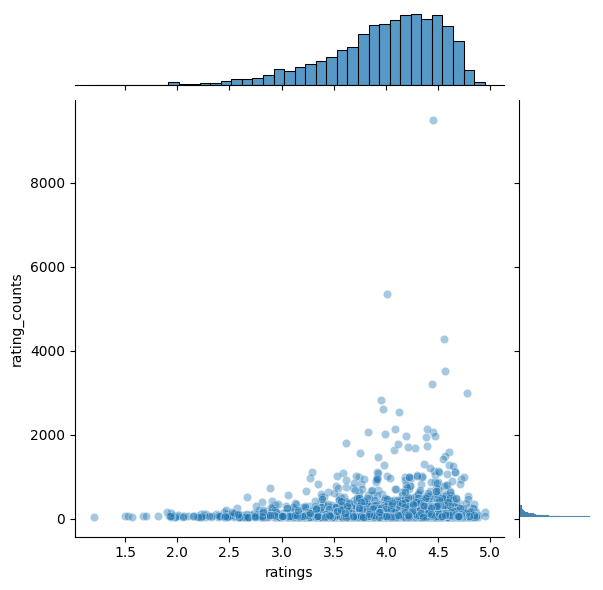

In [40]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='ratings', y='rating_counts', data=ratings_mean_count, alpha=0.4)

<AxesSubplot: xlabel='product_id'>

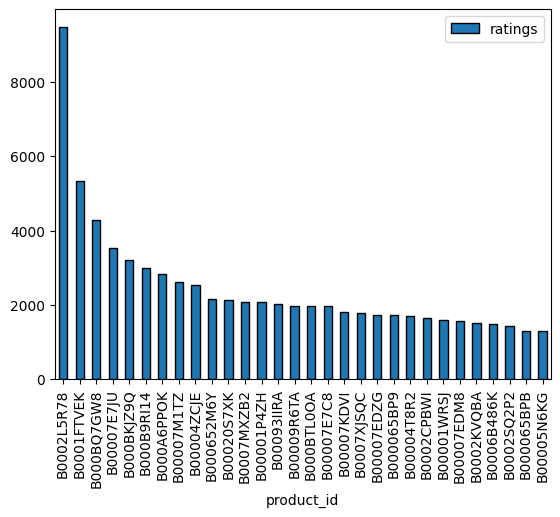

In [41]:
popular_products = pd.DataFrame(new_df.groupby('product_id')['ratings'].count())
most_popular = popular_products.sort_values('ratings', ascending=False)
most_popular.head(30).plot(kind = "bar")

### The above graphs shows the rating count of  each product.We can observe that the amazon product with product id B0002L5R78 has the highest rating which shows that it is the best selling amazon product.

# Step 3: Model Training

## Model-based collaborative filtering system 

These methods are based on machine learning and data mining techniques. The goal is to train models to be able to make predictions. For example, we could use existing user-item interactions to train a model to predict the top-5 items that a user might like the most. One advantage of these methods is that they are able to recommend a larger number of items to a larger number of users, compared to other methods like memory based approach. They have large coverage, even when working with large sparse matrices.

In [49]:
new_df1=new_df.head(10000)
ratings_matrix = new_df1.pivot_table(values='ratings', index='user_id', columns='product_id', fill_value=0)
ratings_matrix.head()

product_id,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400532736,1400599997,1400698987,...,B00000JFMK,B00000JHWX,B00000JI4F,B00000JII6,B00000JMUG,B00000JPPI,B00000JSGF,B00000JYLO,B00000JYWQ,B00000K135
user_id,,,,,,,,,,,,,,,,,,,,,
A01852072Z7B68UHLI5UG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0266076X6KPZ6CCHGVS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0293130VTX2ZXA70JQS,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A030530627MK66BD8V4LN,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0571176384K8RBNKGF8O,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
ratings_matrix.shape

(9832, 76)

In [51]:
X = ratings_matrix.T
X.head()

user_id,A01852072Z7B68UHLI5UG,A0266076X6KPZ6CCHGVS,A0293130VTX2ZXA70JQS,A030530627MK66BD8V4LN,A0571176384K8RBNKGF8O,A0590501PZ7HOWJKBGQ4,A0641581307AKT5MAOU0Q,A076219533YHEV2LJO988,A0821988FXKFYX53V4QG,A099626739FNCRNHIKBCG,...,AZWOPBY75SGAM,AZX0ZDVAFMN78,AZX5LAN9JEAFF,AZX7I110AF0W2,AZXKUK895VGSM,AZXP46IB63PU8,AZYTSU42BZ7TP,AZZGJ2KMWB7R,AZZMV5VT9W7Y8,AZZST8OYL5P4Q
product_id,,,,,,,,,,,,,,,,,,,,,
0972683275,0,0,5,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501520,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1400501776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1400532620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
X.shape

(76, 9832)

In [53]:
X1 = X

In [54]:
#Decomposing the Matrix
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(76, 10)

In [55]:
#Correlation Matrix

correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(76, 76)

In [56]:
X.index[75]

'B00000K135'

Index # of product ID purchased by customer

In [60]:
i = "B00000K135"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

75

## Insight: -
## The above index is the product that a customer purchased from amazon now on the basis of that product we will try to find the other product for different customers that also demand for product that are correlated with this product.

#### Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [62]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(76,)

### Recommending top 10 highly correlated products in sequence

In [65]:
Recommend = list(X.index[correlation_product_ID > 0.65])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:10]

['9575871979',
 '9966694544',
 '9983891212',
 '9985511476',
 'B00000IGBF',
 'B00000J05A',
 'B00000J1SC',
 'B00000J3NF',
 'B00000J434',
 'B00000J4EY']

### The above the top 10 amazon product that are recommended for the user based on their pst purchasing experience.

# Step 4: After making model and checking its accuracy, we are going to deploy it in API/ Web App. 

This step holds a great importance as in this step we make a Web API which integrates our model and let it interacts with user.
The user simply put data he is asked to fill and our API will help in predicting.

### There are many methods to create Web Application like Flask, Streamlit, etc. We going to use streamlit to create API. Below is an API sample refrence with the help of which we can create our own application. 

https://tinyurl.com/bdexnk6v

# Conclusion

After observing the problem statement we have build an efficient model to overcome it. The above model help in recommending the top 10 product based on their past purchasing experience. 